Unique class IDs found in annotations: [ 0  2  6  4  1  3  5  7  8  9 10 11]


C:\Users\Rahila\AppData\Local\Temp\ipykernel_26220\1676255855.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="class_name", order=df["class_name"].value_counts().index, palette="viridis")


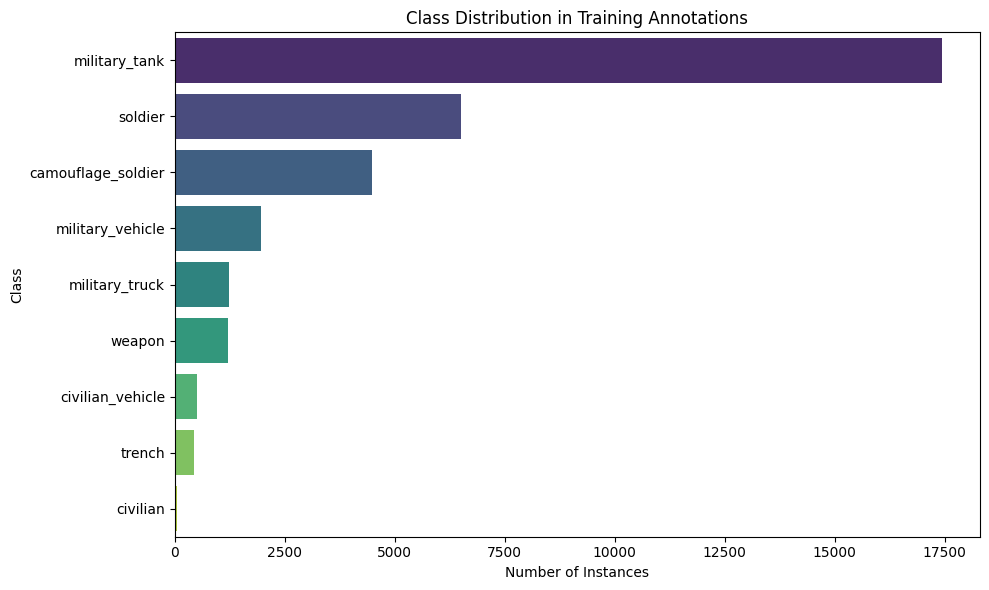

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set path to training dataset
base_dir = r"C:\Users\Rahila\Downloads\Military\military_object_dataset\train"
image_dir = os.path.join(base_dir, "images")
label_dir = os.path.join(base_dir, "labels")

# List of class names (as per YOLO index)
class_labels = [
    "camouflage_soldier", "weapon", "military_tank", "military_truck",
    "military_vehicle", "civilian", "soldier", "civilian_vehicle", "trench"
]

# Function to parse YOLO annotations
def parse_annotation(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    parsed = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_id, x_center, y_center, width, height = map(float, parts)
            parsed.append({
                "file": os.path.basename(label_file).replace('.txt', ''),
                "class_id": int(class_id),
                "x_center": x_center,
                "y_center": y_center,
                "width": width,
                "height": height
            })
    return parsed

# Gather all annotations
ann_stats = []
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        full_path = os.path.join(label_dir, label_file)
        ann_stats.extend(parse_annotation(full_path))

# Check if any data was collected
if not ann_stats:
    raise ValueError("No annotation data found. Please check the label_dir path and files.")

# Convert to DataFrame
df = pd.DataFrame(ann_stats)

# Print unique class IDs found
print("Unique class IDs found in annotations:", df["class_id"].unique())

# Validate and map class_id to class name
valid_ids = list(range(len(class_labels)))
df = df[df["class_id"].isin(valid_ids)]  # Drop any invalid class_ids
df["class_name"] = df["class_id"].apply(lambda x: class_labels[x])

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="class_name", order=df["class_name"].value_counts().index, palette="viridis")
plt.title("Class Distribution in Training Annotations")
plt.xlabel("Number of Instances")
plt.ylabel("Class")
plt.tight_layout()
plt.show()


In [5]:
# train_military_yolo_fast.py

from ultralytics import YOLO
import os
import torch
import matplotlib
import numpy

print("🔧 Torch version:", torch.__version__)
print("🔧 NumPy version:", numpy.__version__)
print("🔧 Matplotlib version:", matplotlib.__version__)
print("🔧 YOLO version:", YOLO.__module__)

# Dataset YAML path
DATA_YAML_PATH = 'C:/Users/Rahila/Downloads/Military/military_object_dataset/military_dataset.yaml'

# Device config
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🚀 Using device: {device}")

# Load smaller YOLO model (nano)
try:
    model = YOLO('yolov8n.pt')  # nano model is fastest
except Exception as e:
    print(f"❌ Failed to load YOLO model: {e}")
    exit()

# Start fast training
try:
    model.train(
        data=DATA_YAML_PATH,
        epochs=5,         # 🔻 Fast dev mode
        imgsz=416,        # 🔻 Lower resolution
        batch=4,          # 🔻 Smaller batch
        device=device,
        project='military_detection_project',
        name='yolov8n_military_fast',
        verbose=True
    )
    print("✅ Fast training completed successfully!")

except Exception as e:
    print(f"❌ Training failed: {e}")


🔧 Torch version: 2.7.1+cpu
🔧 NumPy version: 1.26.4
🔧 Matplotlib version: 3.8.4
🔧 YOLO version: ultralytics.models.yolo.model
🚀 Using device: cpu


100%|██████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:09<00:00, 718kB/s]


Ultralytics 8.3.169  Python-3.12.7 torch-2.7.1+cpu CPU (AMD Ryzen 3 7320U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/Rahila/Downloads/Military/military_object_dataset/military_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_military_fast, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overl

train: Scanning C:\Users\Rahila\Downloads\Military\military_object_dataset\train\labels.cache... 21978 images, 294 back

train: C:\Users\Rahila\Downloads\Military\military_object_dataset\train\images\011224.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 9. Possible class labels are 0-8
train: C:\Users\Rahila\Downloads\Military\military_object_dataset\train\images\011227.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 9. Possible class labels are 0-8
train: C:\Users\Rahila\Downloads\Military\military_object_dataset\train\images\011232.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 9. Possible class labels are 0-8
train: C:\Users\Rahila\Downloads\Military\military_object_dataset\train\images\018712.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
train: C:\Users\Rahila\Downloads\Military\military_object_dataset\train\images\018713.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
train: C:\Users\Ra

WARNING Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 33856. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.20.0 ms, read: 92.247.2 MB/s, size: 113.2 KB)


C:\Users\Rahila\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\Rahila\Downloads\Military\military_object_dataset\val\labels.cache... 2941 images, 273 backgroun

val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\011775.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022716.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022717.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022718.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022719.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Milit


C:\Users\Rahila\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to military_detection_project\yolov8n_military_fast\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to military_detection_project\yolov8n_military_fast
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G        1.5      2.282      1.434         11        416: 100%|██████████| 4034/4034 [13:27:18<00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [04:


                   all       2346       4014      0.367      0.333      0.244      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.474      1.789      1.405          9        416: 100%|██████████| 4034/4034 [7:17:08<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [03:


                   all       2346       4014      0.407      0.351      0.271      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.442      1.654      1.381          1        416: 100%|██████████| 4034/4034 [1:30:34<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [04:


                   all       2346       4014      0.485      0.389      0.332      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.375      1.498      1.343          4        416: 100%|██████████| 4034/4034 [1:13:59<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [03:


                   all       2346       4014      0.495      0.424      0.376      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.325      1.373      1.306         14        416: 100%|██████████| 4034/4034 [1:09:07<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [03:


                   all       2346       4014      0.602      0.409      0.398      0.236

5 epochs completed in 24.959 hours.
Optimizer stripped from military_detection_project\yolov8n_military_fast\weights\last.pt, 6.2MB
Optimizer stripped from military_detection_project\yolov8n_military_fast\weights\best.pt, 6.2MB

Validating military_detection_project\yolov8n_military_fast\weights\best.pt...
Ultralytics 8.3.169  Python-3.12.7 torch-2.7.1+cpu CPU (AMD Ryzen 3 7320U with Radeon Graphics)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 294/294 [02:


                   all       2346       4014      0.602      0.411      0.398      0.236
    camouflage_soldier        385        510       0.71      0.596      0.678      0.353
                weapon        222        358      0.522      0.517      0.496      0.322
         military_tank        938       1787       0.68      0.786      0.754      0.465
        military_truck         84        148      0.303      0.655      0.389      0.239
      military_vehicle        149        307      0.337      0.352      0.266      0.182
              civilian          1          1          1          0          0          0
               soldier        419        744      0.517      0.647        0.6      0.324
      civilian_vehicle         18         42      0.345      0.143      0.197      0.102
                trench         85        117          1          0      0.203      0.133
Speed: 0.9ms preprocess, 51.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to military_d

In [7]:
from ultralytics import YOLO

model = YOLO('military_detection_project/yolov8n_military_fast/weights/best.pt')
metrics = model.val()
print(metrics)


Ultralytics 8.3.169  Python-3.12.7 torch-2.7.1+cpu CPU (AMD Ryzen 3 7320U with Radeon Graphics)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.40.4 ms, read: 31.627.6 MB/s, size: 58.3 KB)


val: Scanning C:\Users\Rahila\Downloads\Military\military_object_dataset\val\labels.cache... 2941 images, 273 backgroun

val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\011775.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022716.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022717.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022718.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Military\military_object_dataset\val\images\022719.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: C:\Users\Rahila\Downloads\Milit


C:\Users\Rahila\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 147/147 [02:


                   all       2346       4014      0.601       0.41      0.398      0.235
    camouflage_soldier        385        510       0.71      0.596      0.678      0.353
                weapon        222        358      0.525       0.52        0.5      0.322
         military_tank        938       1787       0.68      0.786      0.754      0.465
        military_truck         84        148      0.303      0.649      0.385      0.237
      military_vehicle        149        307      0.334      0.349      0.266      0.182
              civilian          1          1          1          0          0          0
               soldier        419        744      0.515      0.647        0.6      0.325
      civilian_vehicle         18         42      0.345      0.143      0.197      0.102
                trench         85        117          1          0        0.2      0.131
Speed: 0.7ms preprocess, 49.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detec